# Домашняя работа 1
## В данном задании мы будем сжимать звуковую дорожку при помощи алгоритма PCA

In [ ]:
# Понадобится для чтения и записи аудио файлов
from scipy.io import wavfile

# Это нужно для проигрывания аудио файлов прямо в блокноте
from IPython.display import Audio

# А это набор для этого задания
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

In [ ]:
# Скачаем данные
! wget https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav

--2023-04-23 06:28:02--  https://www.dropbox.com/s/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav [following]
--2023-04-23 06:28:02--  https://www.dropbox.com/s/raw/p5147nr8mzemxnr/Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc87d2d7f2e6aac93a66cf26bad0.dl.dropboxusercontent.com/cd/0/inline/B6vjQuIxRHN9c-UpPuGLdHEx0m4xiUXgDRpyn3ovGTVD3wq4tBBT0CLnEjeS7zf5BNu4lTx1BxzrT6pTBb9xeBDAcI0aF5JVUeupgs4E_UfV94KYn6KhpUmmwDDQscv8K4JtxoJ6IbDRVs_rp6fQfRv-dvJoEvNnxs_jUI1NrRSlSg/file# [following]
--2023-04-23 06:28:02--  https://uc87d2

In [ ]:
# Прочитаем аудио дорожку при помощи wavfile
samplerate, data = wavfile.read('Beethoven_Violin_Sonata_Op_96_first_movement_bars_1-22.wav')

`samplerate` есть частота дискретизации - стандартное для аудио значение -- 44100 Гц.

NOTE: **Частота дискретизации** говорит о том, сколько последовательных элементов массива с сигналом кодируют звук длительностью 1 секунда.

Подробнее о кодировании звука [тут](https://ru.wikipedia.org/wiki/Кодирование_звуковой_информации).

In [ ]:
# Посмотрим какая у нас частота дискретезации
print(samplerate)

44100


In [ ]:
# Если поделить длину массива сигнала на samplerate, получится длительность аудиодорожки в секундах

print(len(data) / samplerate)

# 45 секунд - похоже на правду:)

45.139591836734695


In [ ]:
# Заметим, что звук - стерео, так как сигнал кодируется двумя каналами (для левого и правого динамика):

print(data.shape)

(1990656, 2)


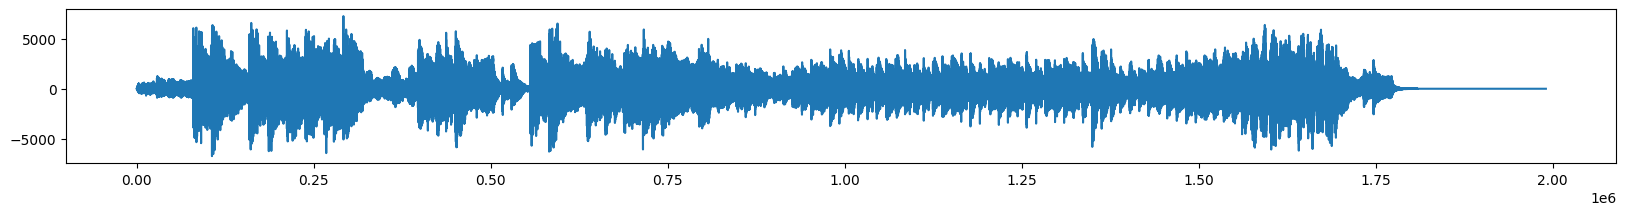

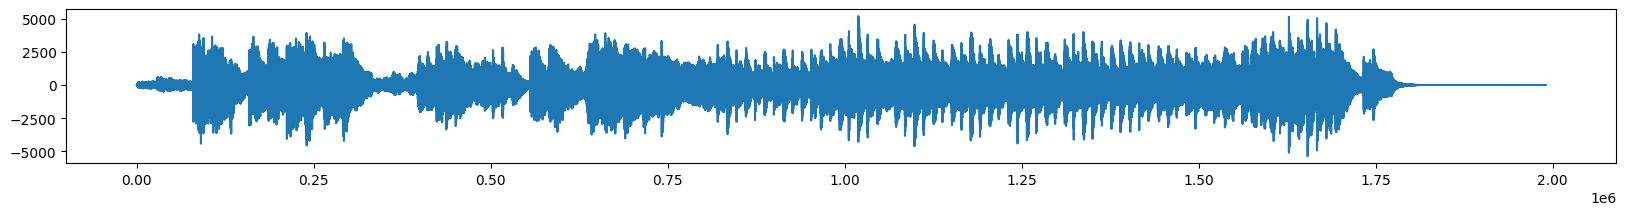

In [ ]:
# Отрисуем сигналы в обоих каналах

# Канал 1
plt.figure(figsize=(20,2))
plt.plot(data[:,0])
plt.show()

# Канал 2
plt.figure(figsize=(20,2))
plt.plot(data[:,1])
plt.show()

In [ ]:
# Усредним каналы, и получим моно звук, с которым будет проще работать

mono_sound = np.mean(data, axis=1)
print(mono_sound.shape)

(1990656,)


In [ ]:
# Давайте послушаем наконец, что же мы будем сжимать:)

Audio(mono_sound, rate = samplerate)

In [ ]:
# Для удобства - обрежем массив с сигналом так, чтобы его было удобнее делить на равные части, датасет из которых и необходимо будет сжать известными вам методами.
# На самом деле способ очень похож на тот, которым мы сжимали картинку, деля её на прямоугольные подкартинки, только здесь задача еще проще)

mono_sound_to_cut = mono_sound[:1990000]

In [ ]:
# Проверим, что наш звук теперь это просто вектор чисел

print(mono_sound_to_cut.shape)

(1990000,)


#### Задание 1:

**Подсказка:** В этом задании нужно всего лишь вспомнить как пользоваться методом `.reshape()`


1. Разделите сигнал на равные части (длину каждой части возьмите равной 1000) и соберите из них "датасет", который будет представлять из себя двухмерный массив - "матрицу", в которой каждая часть сигнала длины 1000 находится в отдельной строке).

    То есть первая часть содержит первые 1000 чисел сигнала и находится в первой строке матрицы, вторая часть следующие 1000 чисел сигнала и находится во второй строке матрицы и так далее.

    Это также как мы делали с кусочками картинки и получали матрицу размера `(24, 1152000)`!

In [ ]:
# Ваше решение здесь

sound = mono_sound_to_cut.reshape(-1, 1000)
print(sound.shape)

(1990, 1000)


2. Напишите функцию, которая будет переводить вашу "матрицу" обратно в звуковой сигнал, то есть разворачивать данные обратно из матрицы размера `(число объектов, 1000)` в вектор длины `(число объектов * 1000)`. Проверьте, что все работает верно, путем воспроизведения "востановленного" сигнала -- он должен совпасть в точности с изначальным (ведь им на самом деле и является).

In [ ]:
# Ваше решение здесь

def return_sound(x):
  x = x.reshape((x.shape[0]*1000))
  return x

sound_test = return_sound(sound)
print(sound_test.shape)

(1990000,)


In [ ]:
Audio(sound_test, rate = samplerate)

#### Задание 2

Подсказка: код этого пункта практически полностью совпадает с кодом, который мы использовали на семинаре.

1. Выполните PCA преобразование нашей матрицы, и получите данные, сжатые в пространство меньшей размерности.

    На этом этапе у нас есть наш "датасет" с 1000 "признаками" и мы хотим уменьшить число "признаков" путем применения метода PCA. Число компонент предлагается выбрать вам, но для начала не стоит брать слишком маленькое число, чтобы потом было проще понять, в случае плохого результата -- компонент оказалось недостаточно или вы где-то ошиблись:)


In [ ]:
# Ваше решение здесь

pca = PCA(n_components=100)

sound_pca = pca.fit_transform(sound)
print(sound_pca.shape)

(1990, 100)



2. Постройте сами две главные компоненты в наглядной форме. Сделайте выводы исходя из их вида.

    То есть необходимо применить метод PCA к нашей матрице с числом компонент, равным 2 (тем самым получив датасет с 2 "признаками"). Это позволит нам отрисовать данные на плоскости, чтобы попытаться уловить зависимости.

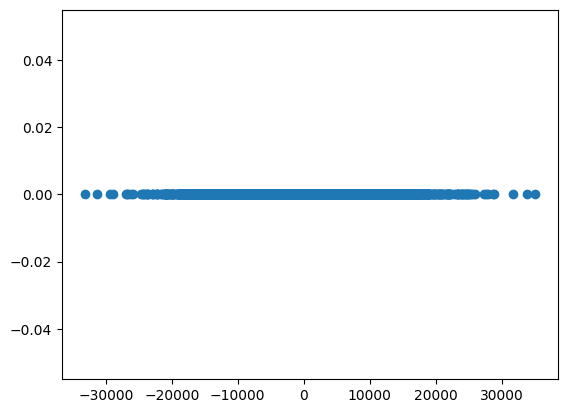

In [ ]:
# Ваше решение здесь

plt.scatter(sound_pca, np.zeros(sound_pca.shape))

3. Постройте scatter plot датасета в пространстве первых двух компонент, а третью используйте как цвет.
    То есть необходимо применить метод PCA уже с 3 компонентами и нарисовать опять точки, только передав третью компоненту в качестве цвета. (мы также делали на семинаре с картинкой)

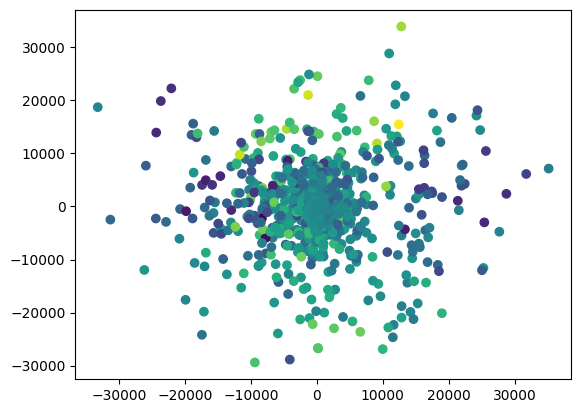

In [ ]:
# Ваше решение здесь

plt.scatter(sound_pca[:, 0], sound_pca[:, 1], c = sound_pca[:, 2])

plt.show()

#### Задание 3

Нам осталось заняться непосредственно "сжатием" звука и проверкой правильности наших действий.

1. Выполните обратное PCA преобразование сжатых данных и получите "матрицу" с сжатым звуком.

    Воспользуйтесь обратным преобразованием PCA (inverse_transform), чтобы из матрицы размера `(число объектов, число компонент)` перейти в матрицу размера `(число объектов, 1000)`.

(1990, 1000)

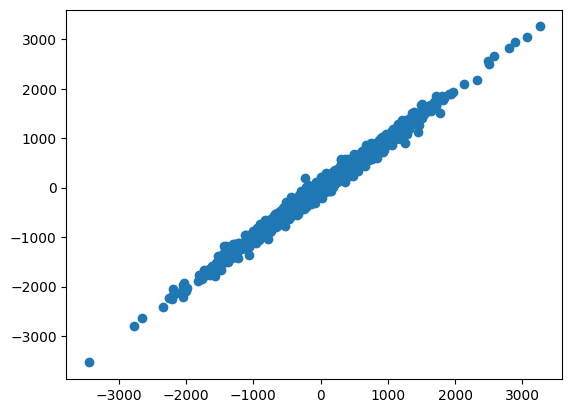

In [ ]:
# Ваше решение здесь

sound_inversed = pca.inverse_transform(sound_pca)

plt.scatter(sound_inversed[:, 0], sound_inversed[:, 1])

sound_inversed.shape

2. Преобразуйте "матрицу", получившуюся обратным преобразованием, в сигнал (одномерный массив, наш "сжатый" монозвук), и послушайте результат `(Audio(YOUR_RESULT, rate = samplerate)`.

    Воспользуйтесь функцией, которую написали в первом задании, чтобы преобразовать матрицу с "сжатым" звуком (размер после обратного преобразования должен быть такой же, как и у оригинальной матрицы) в вектор-сигнал, который уже можно будет прослушать. Если звук похож на оригинал, то вы все сделали правильно! 

In [ ]:
# Ваше решение здесь

final_sound = return_sound(sound_inversed)
print(sound_inversed.shape)

(1990, 1000)


In [ ]:
Audio(final_sound, rate = samplerate)

3. Исследуйте зависимость качества звука от числа компонент. Подберите "на слух" минимальное число компонент, при котором звук практически не отличается от оригинала.

    Добавьте в ячейки два варианта звуковой дорожки -- оригинальную и выбранную вами. Укажите какое число компонент вы оставили.

Подсказка! попробуйте отфильтровать сигнал с помощью функции `gaussian_filter1d` из `scipy.ndimage`. Это поможет убрать неприятный дробовой шум при сильном сжатии

Пример кода для фильтрации - `Audio(gaussian_filter1d(mono_sound_compressed, 2), rate = samplerate)`

In [ ]:
# Оригинальная аудиодорожка

Audio(mono_sound, rate = samplerate)

In [ ]:
# Сжатая аудио дорожка с 100 компонентами

from scipy.ndimage import gaussian_filter1d

Audio(gaussian_filter1d(final_sound, 2), rate = samplerate)


3.1   Ответьте на вопросы: 
- Количество компонент, которое вы выбрали это много или мало? 
- Как сильно можно сжать звук таким образом? 
- А если нам дадут другую звуковую дорожку, нам надо сделать то же самое, чтобы сжать звук, как автоматически подобрать число компонент и возможно ли это?




In [ ]:
# Ваше решение здесь

""" 
    
    - Количество компонент (= 100) достаточно для сжатия данной аудиозаписи
    - Данным методом удалось сжать аудиозаписть в 10 раз 
    - PCA может быть чувствителен к выбросам и шуму в данных, что может привести к искажениям в результатах сжатия. 
      Поэтому перед применением PCA рекомендуется провести предварительную обработку данных для удаления выбросов и шума.
      В целом, автоматически определить оптимальное число компонент в PCA для звуковых данных может быть сложно, 
      так как выбор числа компонент должен основываться на содержательном анализе данных
      
"""

4. (доп задание)

  a) Оберните получившийся код по сжатию звука в одну или несколько функций

  b) Проведите исследование того, как степень сжатия (соотношения размера частей, на которые делился сигнал в задании 1.1 к размеру пространсва, в которое вы сжимали данные с помощью PCA) влияет на звук, по субъективным ощущениям. Начиная с какой степени сжания сильно слышится потеря качества? (как с учетом фильтрации с помощью gaussian_filter1d, так и без неё)

  d) Что степень сжатия означает для PCA? Для большой аудиозаписи (3 мин, например) мы хотели бы разбить на большее, меньшее или такое же число отрезков как и для предложенной аудиозаписи? Почему?

  c) Можно ли как-то автоматически подобрать степерь сжатия? За что она отвечает в нашей задаче. Как степень сжатия влияет на звук? Почему она так влияет на звук? 



In [ ]:
# Понадобится для чтения и записи аудио файлов
from scipy.io import wavfile
from google.colab import files

# Это нужно для проигрывания аудио файлов прямо в блокноте
from IPython.display import Audio

# А это набор для этого задания
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA


# 1. Функция для загрузки файла 

  # 1.1. Загрузка файла с компьютера

def download_file_from_PC():
  uploaded = files.upload()
  for filename in uploaded.keys():
    print('Загруженный файл "{name}" размером = {length} байт'.format(name=filename, length=len(uploaded[filename])))
    
  # 1.2. Загрузка файла по ссылке

def download_file_from_link():
  link = input("Введите ссылку на файл: ")
  ! wget $link

# 2. Обработка и сжатие файла

def file_compression():

  """ Прочитаем аудио дорожку """

  samplerate, data = wavfile.read(input('Введите название сжимаемого файла (Например, "file.wav"): '))
  
  """ Усредним каналы, и получим моно звук, с которым будет проще работать """
  
  mono_sound = np.mean(data, axis=1)

  """ Округлим массив до 1000 для удобства сжатия """

  new_size = (len(mono_sound) // 1000) * 1000
  mono_sound_to_cut = mono_sound[:new_size]

  """ Разделим сигнал на равные части (длину каждой части возьмите равной 1000) и соберем из них "датасет" """

  sound = mono_sound_to_cut.reshape(-1, 1000)

  """ Выполним PCA преобразование нашей матрицы, и получим данные, сжатые в пространство меньшей размерности """

  pca = PCA(n_components=100)
  sound_pca = pca.fit_transform(sound)

  """ Выполним обратное PCA преобразование сжатых данных и получим "матрицу" с сжатым звуком """

  sound_inversed = pca.inverse_transform(sound_pca)

  """ Преобразуем "матрицу" в сигнал и прослушаем сжатую аудиозапись """

  final_sound = sound_inversed.reshape((sound_inversed.shape[0]*1000))
  Audio(final_sound, rate = samplerate)